Exercises
Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

$H_0$ The internet latency has not changed since we switched internet providers.

$H_a$ The internet latency has gone down since we switched internet providers.

True positive: We have rejected our null hypothesis. The internet latency has reduced since we switched internet providers.
True negative: We have failed to reject the null hypothesis. The internet has not changed since we switched internet providers
Type I error: We have rejected our null hypotheses (H_0) however we belive that our H_0 remains true. The internet latency has remained the same.
Type II error: We have failed to reject our null hypotheses however the findings show that the internet latency has reduced since we switched internet providers.

Is the website redesign any good?

$H_0$ The website redisign is straight fire. You are just a hater.

$H_a$ Users find the website redisgn to be less appealing than the original design.

True positive: We have rejected the null hypothesis. Users find the new website redisign to be less appealing than the original design.
True negative: We have failed to reject the null hypothesis. The website redisign is as a basis of measurable fact: fire.
Type I error: We have rejected the null hypothesis. However the null hypotheses remains true and the webiste is in fact fire. And yous a hater.
Type II error: We have failed to reject the null hypothesis. However the null hypotheses is false and the websight redisign is 'meh' at best.

Is our television ad driving more sales?

$H_0$ Our television ad has had no change in sales.

$H_a$ Our televsion ad has lead to an increase in sales.

True positive: We have rejected our null hypothesis. The television ad has had an increase in our sales.
True negative: We have failed to reject our null hypothesis. The television ad has not had a change in sales.
Type I error: We have rejected our null hypothesis. However the ad has had no measureable change in sales.
Type II error: We have failed to reject our null hypothesis. However the ad has caused a measurable change in sales. 

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from scipy import stats


from sqlalchemy import create_engine, text
from env import get_connection

In [6]:
engine = create_engine(get_connection('telco_churn'))

mpg = data('mpg')

In [3]:
codeup_macs = {
    'Codeup Student':[49 , 1],
    'Not Codeup Student':[20 , 30],
}
index = ['Uses a Macbook',"Doesn't Use A Macbook"]


In [17]:
df_macs = pd.DataFrame(codeup_macs, index=index)

In [18]:
chi_mac , p_mac , degf_mac , exp_mac = stats.chi2_contingency(df_macs)

In [20]:
p_mac

1.4116760526193828e-09

# Set up hypothessis next timte. This is a hypothosis test so need ot set up hypothesis before test so you can be dilligent about what you are mesuaring and the meaning of the results


Awnser:

Using a laptop does seem to be coorelated with being a 
Codeup student as the p value is well under our base $a$ value of .05.

2 Choose another 2 categorical variables from the mpg dataset.

State your null and alternative hypotheses.
State your alpha.
Perform a 
chi2 test of indepedence.
State your conclusion

In [49]:
# used to see the number of unique 
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

$H_0$ Car class is not correlated to transmission type.

$H_a$ Car transmission is correlated to car class.

In [26]:
a = .05

In [32]:
mpg['trans_bin'] = np.where(mpg.trans.str.startswith('a'), 'auto','manual')

In [35]:
mpg_class = pd.crosstab(mpg.trans_bin, mpg['class'])

In [36]:
mpg_class

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
trans_bin,,,,,,,
auto,2,24,29,11,20,16,55
manual,3,23,12,0,13,19,7


In [41]:
chi_trans, p_trans, degf_trans, expt_trans = stats.chi2_contingency(mpg_class)

In [42]:
p_trans

7.4513729838250925e-06

Transmission type is very much correlated to car class because there is an incredibly small number smaller than the $a$.

3. Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?

# may have to use series manipulation in python rather than just straight sql query to produce a cross tab

# Correlation Excersises

1. Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?
Peasrsons Coorelation Coefficient as the legnth of feet and arms are continuous.

Does smoking affect when or not someone has lung cancer?
This could be assessed with the chi square test as whether or not someone has cancer is a boolean value.

Is gender independent of a person’s blood type?
This could be tested with a chi square test as both blood type and gender are booleans.

Does whether or not a person has a cat or dog affect whether they live in an apartment?
This would be best awnsered with a chi square test as live an aprtment or not and cat or dog are dog are both boolean values.

Does the length of time of the lecture correlate with a student's grade?
Pearsons test as the legnth of time if catagorical as well as a students grade on a number line.


In [ ]:
2. Use the telco_churn data.

Does tenure correlate with monthly charges?

Total charges?

What happens if you control for phone and internet service?

In [38]:
query_tenure = '''

SELECT tenure , monthly_charges , total_charges
FROM customers
WHERE total_charges <> ' '
;

'''

In [67]:
query_tenure_2 = '''

SELECT *
FROM customers
WHERE total_charges <> ' '
;
'''

In [48]:
tenure_sql = pd.read_sql(query_tenure, engine.connect())

In [68]:
ten_con = pd.read_sql(query_tenure_2, engine.connect())

In [40]:
tenure_sql.head()

,tenure,monthly_charges,total_charges
0,9,65.6,593.3
1,9,59.9,542.4
2,4,73.9,280.85
3,13,98.0,1237.85
4,3,83.9,267.4


In [59]:
ten_con.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,customer_id,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,0002-ORFBO,Yes,No,1,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,0003-MKNFE,Yes,Yes,1,No,No,No,No,No,Yes
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,0004-TLHLJ,Yes,No,2,No,No,Yes,No,No,No
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,0011-IGKFF,Yes,No,2,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,0013-EXCHZ,Yes,No,2,No,No,No,Yes,Yes,No


In [13]:
ten_r , ten_p = stats.pearsonr(tenure_sql.tenure, tenure_sql.monthly_charges)

In [15]:
ten_p

4.09404499149396e-99

In [22]:
ten_r

0.24789985628615005

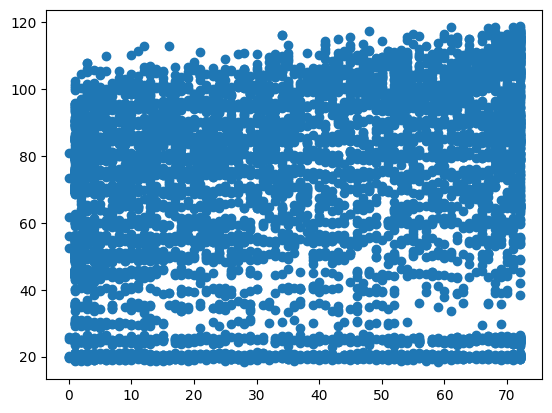

In [21]:
plt.scatter(tenure_sql.tenure, tenure_sql.monthly_charges)
plt.show()

Does tenure correlate with monthly charges?

# Though there is a strong relatoinshoip the two do not coorelate as the r value is ~.24

Does tenure correlate with total charges?

In [34]:
tenure_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   monthly_charges  7043 non-null   float64
 2   total_charges    7043 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB


In [41]:
tenure_sql['total_charges'] = tenure_sql['total_charges'].astype(float)

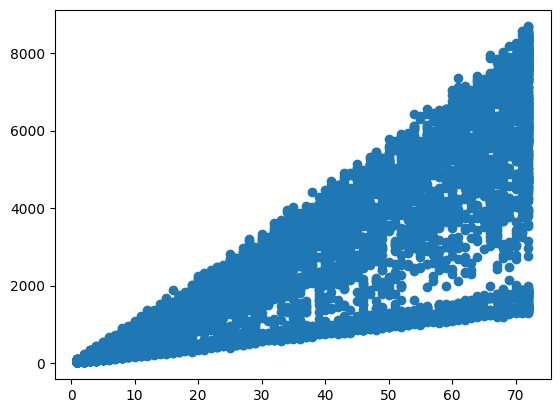

In [42]:
plt.scatter(tenure_sql.tenure, tenure_sql.total_charges)
plt.show()

In [44]:
ten_tot_r, ten_tot_p = stats.pearsonr(tenure_sql.tenure, tenure_sql.total_charges)

In [45]:
ten_tot_r

0.8258804609332019

In [46]:
ten_tot_p

0.0

Does tenure correlate with total charges?

# Yes. Tenure does correlate with total charges as r of 0.8 is very much indicitive of a correlation. Also pretty picture lines go in striaght cone line.

What happens if you control for phone and internet service?

In [69]:
ten_con

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7028,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7029,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7030,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [70]:
ten_con['has_internet'] = np.where(ten_con.internet_service_type_id > 2, 'No Internet' , 'Internet')

In [71]:
ten_con

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,has_internet
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,Internet
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.90,542.4,No,Internet
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,No,1,Yes,1,73.90,280.85,Yes,Internet
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes,Internet
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes,Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,Yes,No,No,2,No,2,55.15,742.9,No,Internet
7028,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,Yes,1,Yes,1,85.10,1873.7,Yes,Internet
7029,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,1,Yes,2,50.30,92.75,No,Internet
7030,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,No,Yes,3,No,2,67.85,4627.65,No,Internet


In [75]:
ten_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7032 non-null   object 
 1   gender                    7032 non-null   object 
 2   senior_citizen            7032 non-null   int64  
 3   partner                   7032 non-null   object 
 4   dependents                7032 non-null   object 
 5   tenure                    7032 non-null   int64  
 6   phone_service             7032 non-null   object 
 7   multiple_lines            7032 non-null   object 
 8   internet_service_type_id  7032 non-null   int64  
 9   online_security           7032 non-null   object 
 10  online_backup             7032 non-null   object 
 11  device_protection         7032 non-null   object 
 12  tech_support              7032 non-null   object 
 13  streaming_tv              7032 non-null   object 
 14  streamin

In [77]:
internets = pd.crosstab(ten_con.tenure,ten_con.has_internet)

In [79]:
internets.head()

has_internet,Internet,No Internet
tenure,,
1,447,166
2,191,47
3,161,39
4,138,38
5,108,25


In [84]:
internets_r , internets_p = stats.pearsonr(ten_con.has_internet,ten_con.tenure)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

Answer with the type of test you would use (assume normal distribution):

1. Is there a difference in grades of students on the second floor compared to grades of all students?

Are adults who drink milk taller than adults who don't drink milk?

Is the price of gas higher in Texas or in New Mexico?

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

Is there a difference in grades of students on the second floor compared to grades of all students?
# This would use a one sample two tail t-test. We would be looking at the mean of the students but checking for the diffeernce wither better or worse.

Are adults who drink milk taller than adults who don't drink milk?
# This would be two samples (Independent) one tail. We are looking at the differnce of two seperate group

Is the price of gas higher in Texas or in New Mexico?
# This would be a two sample one tail test. As we are using two different distributions but only one direction.

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

# Anova because there are three differnt samples we are loking at.

# two samples two tails. We are looking at the differences irrespective of direction of chancge between two independaent groups.

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

$H_0$ There is no differece between time it takes to sell a home between the two offices.

$H_a$ There is a difference between time it takes to sell a home between the two offices.

This will be a two sampled two tailed t-test

In [87]:
office_one = stats.norm(90,15)

In [89]:
office_two = stats.norm(100,20)

In [93]:
office_two_50 = office_two.rvs(50)

<function matplotlib.pyplot.show(close=None, block=None)>

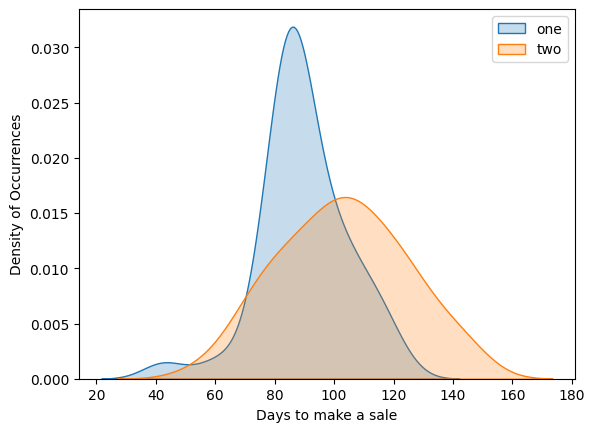

In [206]:
sns.kdeplot(data=office_one_40, label='one', fill= True)
sns.kdeplot(office_two_50, label='two', fill = True)
plt.ylabel('Density of Occurrences')
plt.xlabel('Days to make a sale')
plt.legend()
plt.show

In [111]:
office_t ,office_p = stats.ttest_ind(office_one_40, office_two_50)

In [113]:
office_t , office_p

(-2.316432983908589, 0.02285799971240047)

In [161]:
a = 0.05

if office_p < a:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


There is a diffence between the average time of sales. Office two on average takes longer to make a sale.

# 
3. Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$ There is no difference in fuel efficiency in cars from 2008 vs 1999

$H_a$ There is a difference in fuel efficiency in cars from 2008 vs 1999

This will be a two sample, two tailed t-test.

In [128]:
y_1999 = mpg[mpg.year == 1999].hwy
y_2008 = mpg[mpg.year == 2008].hwy

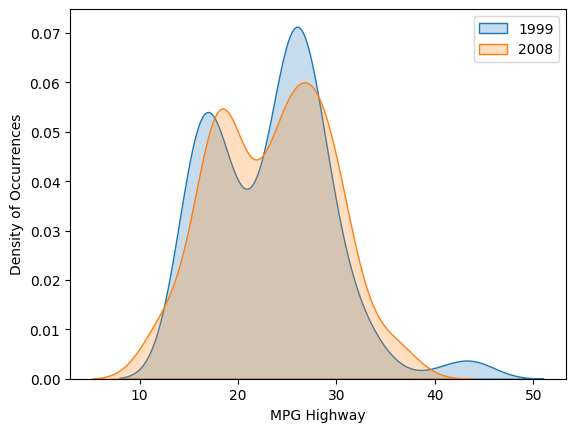

In [205]:
sns.kdeplot(data=y_1999, label='1999', fill= True)
sns.kdeplot(y_2008, label='2008', fill = True)
plt.ylabel('Density of Occurrences')
plt.xlabel('MPG Highway')
plt.legend()
plt.show()

In [135]:
mpg_year_t , mpg_year_p = stats.ttest_ind(y_1999, y_2008)

In [137]:
mpg_year_t , mpg_year_p

(-0.03286431672888292, 0.9738110448529322)

In [160]:
a = 0.05

if mpg_year_p < a:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


There is not a statistically significant threshhold to determine that there is a differnce between fuel efficiancy between the years 2008 and 1999

# Are compact cars more fuel-efficient than the average car?

$H_0$ Compact cars are more fuel-effiecient than the average car.

$H_a$ Compact cars are less fuel-effiecient than the average car.

This will be a one sample, one tailed t-test.

In [149]:
hwy = mpg.hwy

In [150]:
compact = mpg[mpg['class'] == 'compact'].hwy

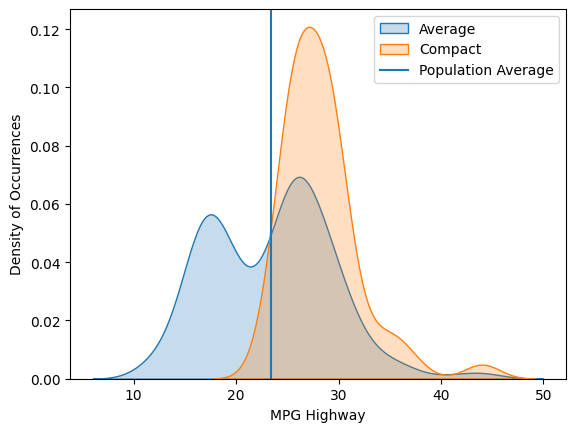

In [204]:
sns.kdeplot(data=hwy, label='Average', fill= True)
sns.kdeplot(compact, label='Compact', fill = True)
plt.axvline(hwy.mean() , label= 'Population Average')
plt.ylabel('Density of Occurrences')
plt.xlabel('MPG Highway')
plt.legend()
plt.show()

In [165]:
avg_t , avg_p = stats.ttest_1samp(compact, hwy.mean())

In [166]:
avg_t , avg_p

(8.806470666529446, 1.9716962312411042e-11)

In [180]:
a = 0.05

if (avg_p /2) < a and avg_t > 0:
    print('We reject the null hypothesis. Compact cars are more fuel effiecient than the average car.')
else:
    print('We have failed to reject the null hypothesis.')


We reject the null hypothesis. Compact cars are more fuel effiecient than the average car.


# Do manual cars get better gas mileage than automatic cars?

$H_0$ Manual cars get better gas mileage than automatic cars.

$H_a$ Manual cars do not get better gas mileage than automatic cars.

This test will use two samples and will look at one tail.

In [182]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [191]:
man_mpg = mpg[~mpg.trans.str.startswith('a')].hwy
auto_mpg = mpg[mpg.trans.str.startswith('a')].hwy

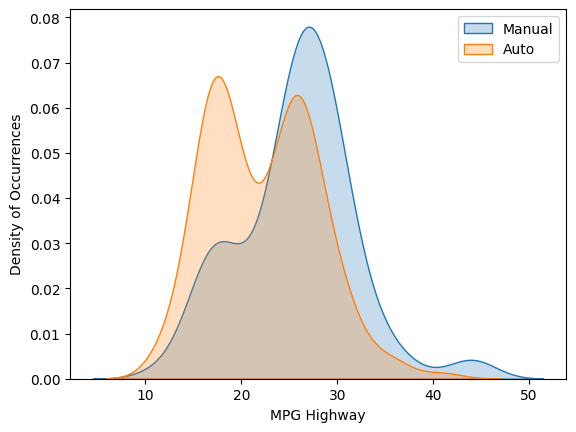

In [203]:
sns.kdeplot(man_mpg, label='Manual', fill= True)
sns.kdeplot(auto_mpg, label='Auto', fill = True)
plt.ylabel('Density of Occurrences')
plt.xlabel('MPG Highway')
plt.legend()
plt.show()

In [194]:
t_man , p_man = stats.ttest_ind(man_mpg, auto_mpg)

In [195]:
t_man , p_man

(4.368349972819688, 1.888044765552951e-05)

In [197]:
a = 0.05

if (p_man /2) < a and t_man > 0:
    print('We have failed to reject the null hypothesis.')
else:
    print('We reject the null hypothesis.')


We have failed to reject the null hypothesis.


We have failed to reject the null hypothosis. Manual cars have better gas miliage than automatic cars.